<a href="https://colab.research.google.com/github/SaranyaKannan28/Codesoft/blob/main/codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chardet



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

titanic = pd.read_csv('Titanic-Dataset.csv')

print("Dataset Head:\n", titanic.head())

print("\nColumns:\n", titanic.columns)


titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna('S', inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Dataset Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

<ipython-input-5-905904082525>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-5-905904082525>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Detected file encoding: ISO-8859-1

Dataset loaded successfully!
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1  

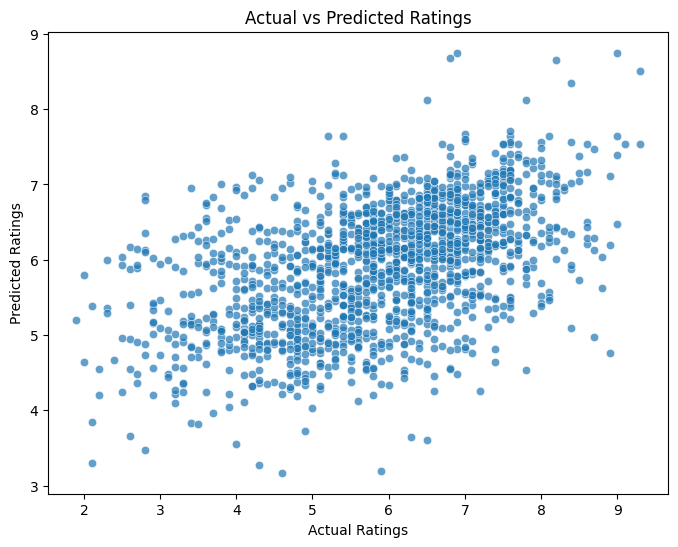


Model saved as 'movie_rating_predictor.pkl'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import chardet
import joblib

file_path = 'IMDb Movies India.csv'

try:
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        detected_encoding = result['encoding']
        print(f"Detected file encoding: {detected_encoding}")
except Exception as e:
    print(f"Error detecting encoding: {e}")
    detected_encoding = 'utf-8'

try:
    df = pd.read_csv(file_path, encoding=detected_encoding)
    print("\nDataset loaded successfully!")
    print(df.head())
except UnicodeDecodeError as e:
    print(f"\nUnicodeDecodeError: {e}")
    exit()
except Exception as e:
    print(f"\nError loading the dataset: {e}")
    exit()

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna(subset=['Rating'])

features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year']
target = 'Rating
df = df[features + [target]]

df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

df['Year'] = df['Year'].str.extract('(\d{4})')

df = df.dropna(subset=['Year'])

df['Year'] = df['Year'].astype(int)

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]),
                                columns=encoder.get_feature_names_out())

df = df.drop(columns=categorical_features).reset_index(drop=True)
df = pd.concat([df, encoded_features], axis=1)

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

joblib.dump(model, 'movie_rating_predictor.pkl')
print("\nModel saved as 'movie_rating_predictor.pkl'.")


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50

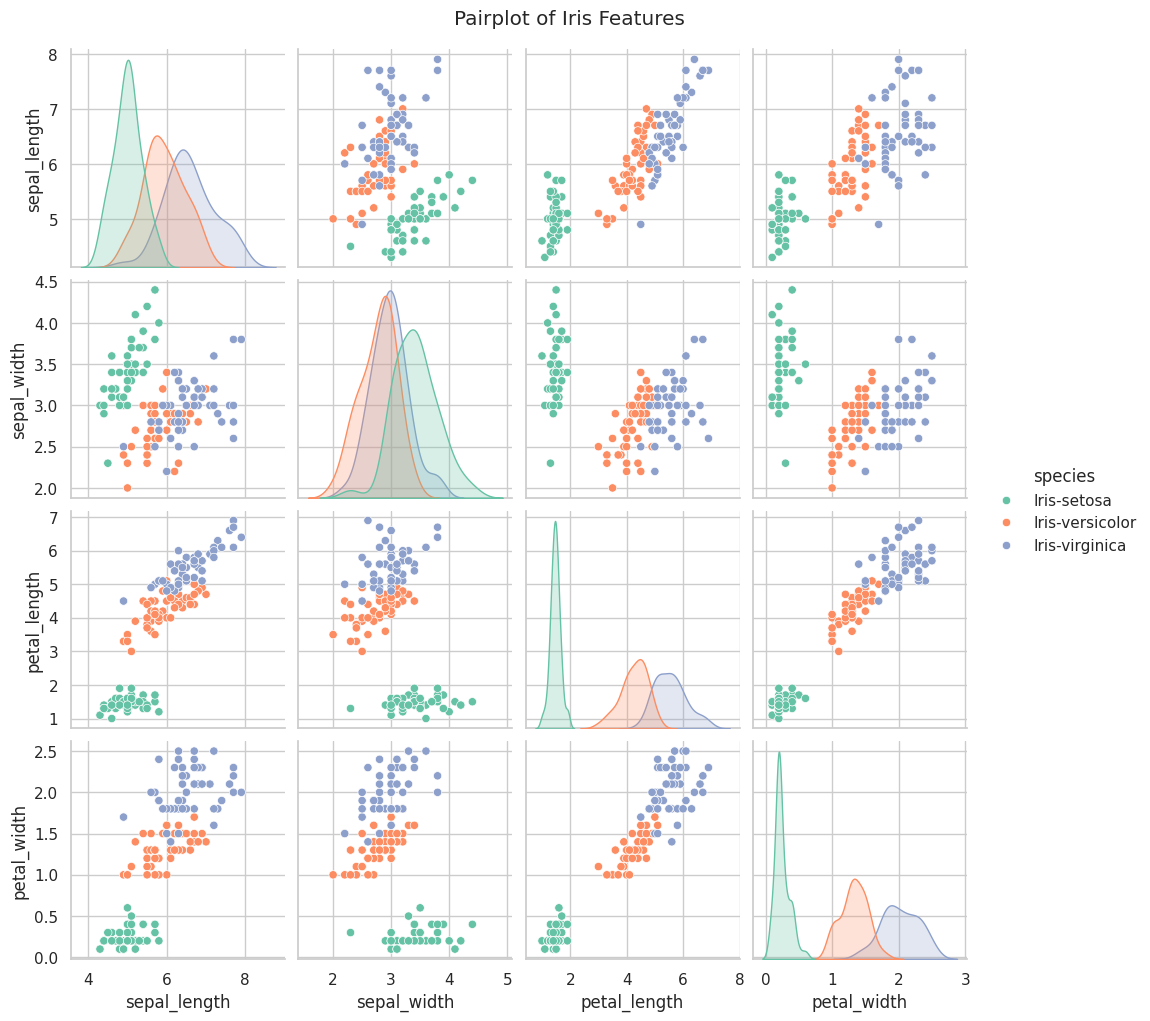

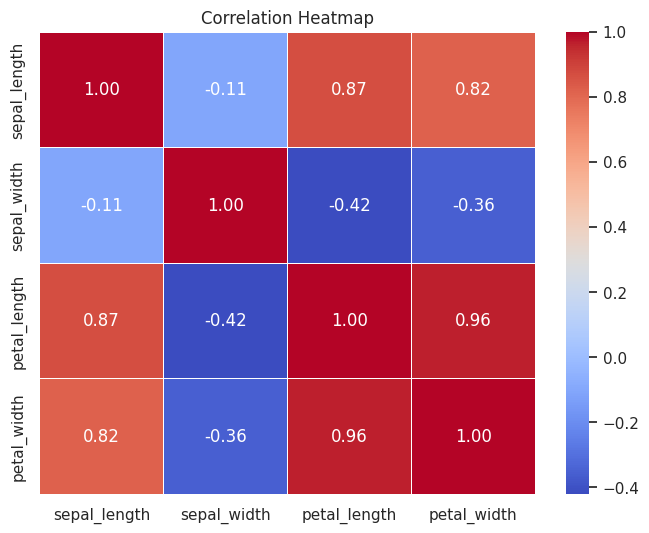

<ipython-input-7-1f1f37b8776e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y='sepal_length', palette='Set2')


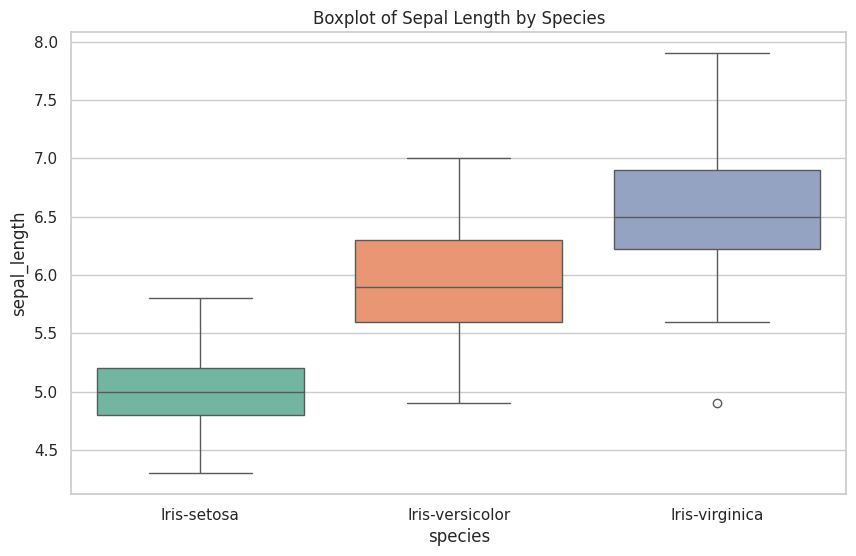

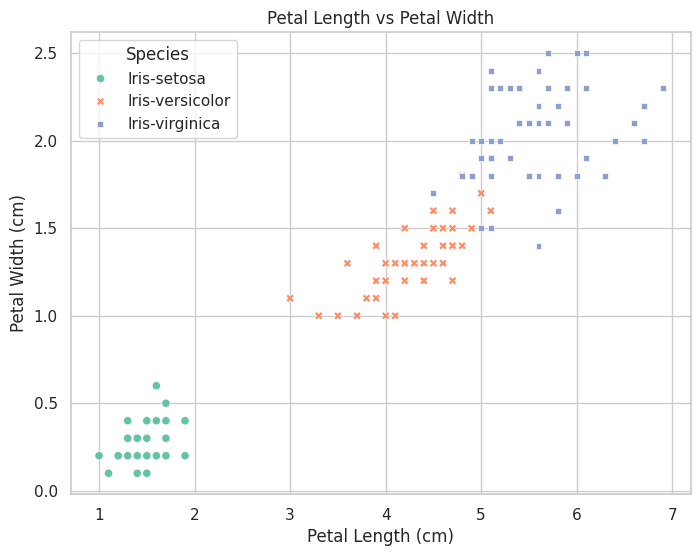


Logistic Regression Accuracy: 100.00%
Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Support Vector Machine Accuracy: 100.00%
Support Vector Machine Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Decision Tree Classifier 

<ipython-input-7-1f1f37b8776e>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='Set2')


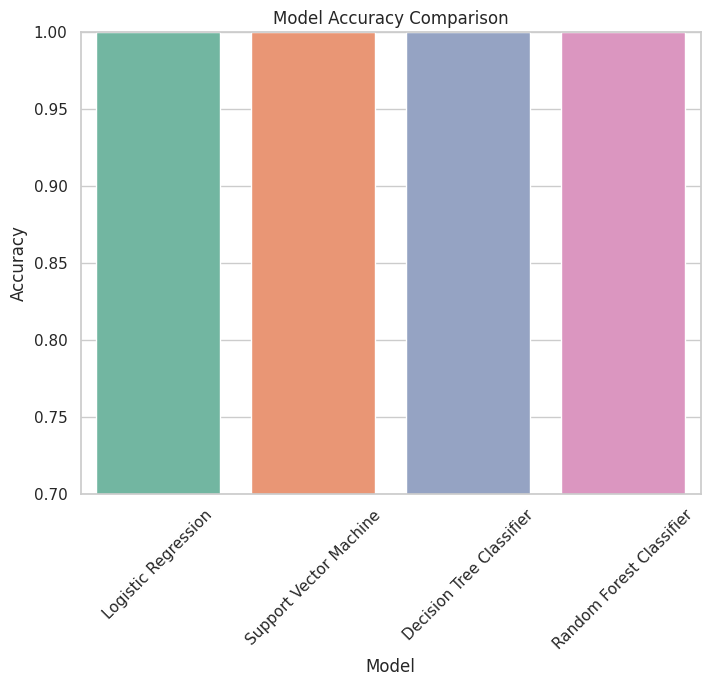

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('IRIS.csv')
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Description:")
print(data.describe())

print("\nClass Distribution:")
print(data['species'].value_counts())

print("\nMissing Values in Dataset:")
print(data.isnull().sum())

sns.set(style="whitegrid")

sns.pairplot(data, hue='species', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = data.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='sepal_length', palette='Set2')
plt.title("Boxplot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', style='species', palette='Set2')
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

X = data.drop('species', axis=1)
y = data['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_estimators=100)
}


for model_name, model in models.items():

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    print(f"\n{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, predictions)}")

model_accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.show()


Dataset Preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing Values in Dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Dataset Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0

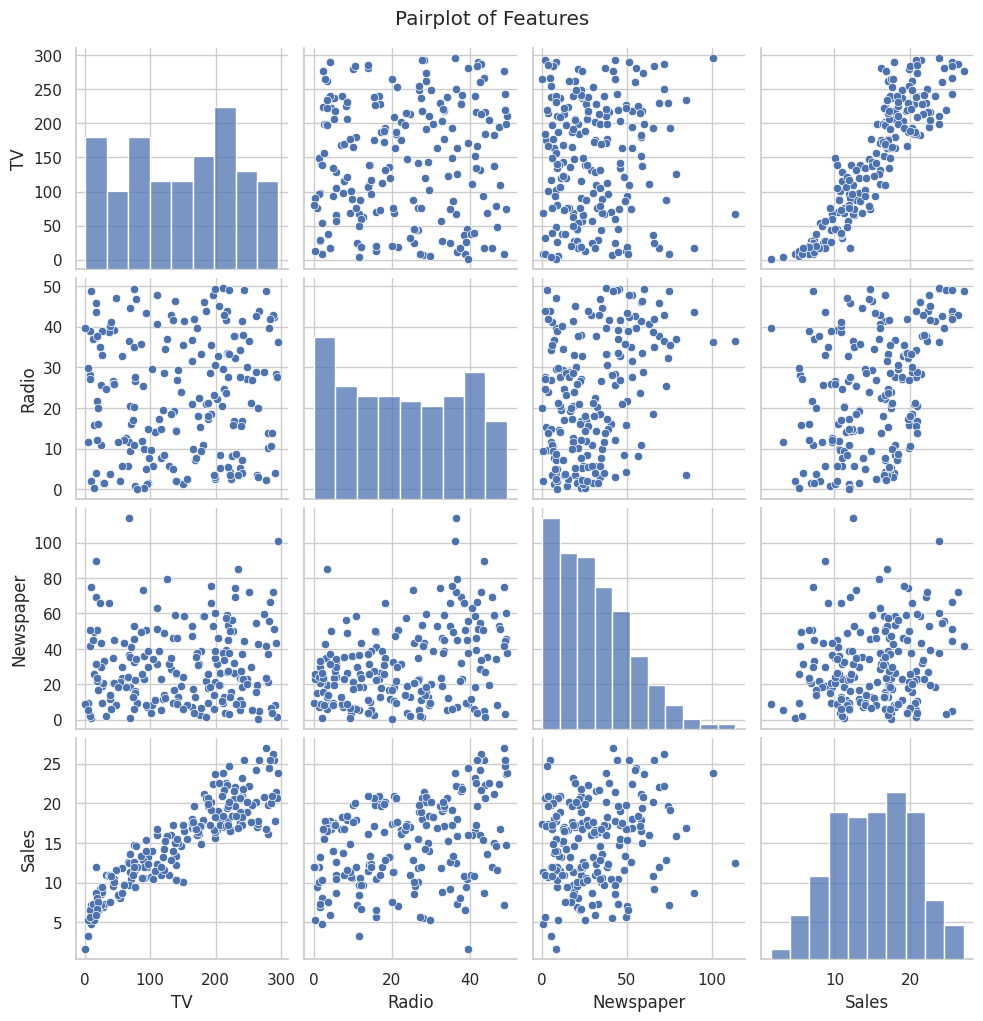

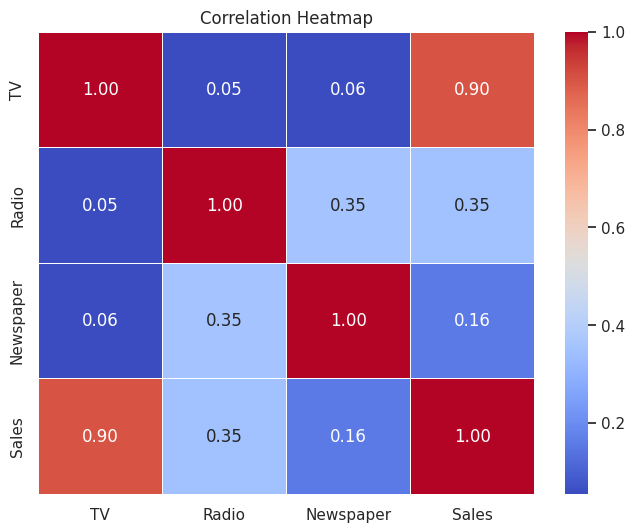


Linear Regression Performance:
Mean Squared Error: 2.91
Mean Absolute Error: 1.27
R-squared: 0.91

Random Forest Regressor Performance:
Mean Squared Error: 1.44
Mean Absolute Error: 0.92
R-squared: 0.95


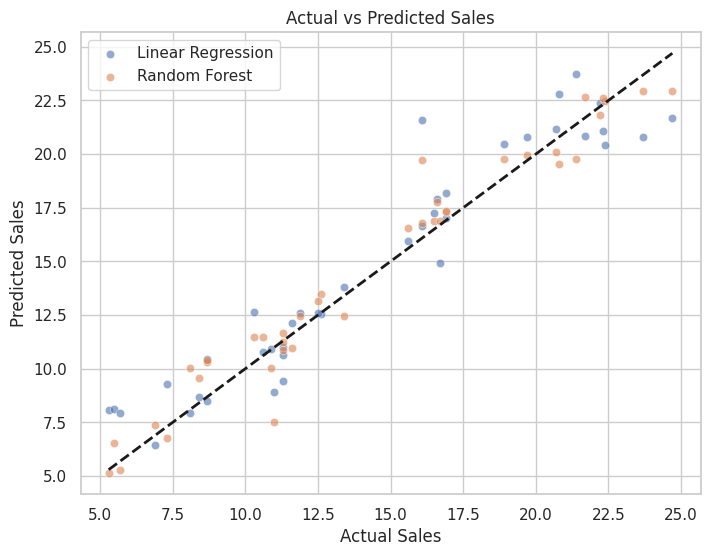

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


print("Dataset Preview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Dataset:")
print(df.isnull().sum())

print("\nDataset Summary Statistics:")
print(df.describe())

sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

X = df.drop(columns=['Sales'])
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)


lin_reg_pred = lin_reg.predict(X_test)
rf_reg_pred = rf_reg.predict(X_test)


def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

evaluate_model("Linear Regression", y_test, lin_reg_pred)
evaluate_model("Random Forest Regressor", y_test, rf_reg_pred)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lin_reg_pred, label='Linear Regression', alpha=0.6)
sns.scatterplot(x=y_test, y=rf_reg_pred, label='Random Forest', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()


# New Section